# Trabalho Prático de Inteligência Artificial
*Bryan Santos Oliveira - 02/2022*

## Classificação de Exoplanetas
O objetivo deste trabalho prático é de praticar os conceitos aprendidos na disciplina e de adquirir experiência no uso de alguns dos principais métodos de classificação, na avaliação de modelos e na interpretação e apresentação de resultados de experimentos. Utilizaremos os seguintes métodos em um problema de classificação binária de candidatos a exoplanetas:

- Naive Bayes
- Decision Tree
- k-Nearest Neighbors
- Support Vector Machines
- Random Forest
- Gradient Tree Boosting.

#### Primeiro passo: Importando todas as Classes e bibliotecas

In [57]:
# Uso geral
import pandas
from sklearn.model_selection import train_test_split
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np

# Kfold
from sklearn.model_selection import cross_val_score, KFold

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Decision Tree
from sklearn import tree
import graphviz

# SVM
from sklearn import svm

# Knn
from sklearn.neighbors import KNeighborsClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier

#### Segundo passo: Lendo o arquivo CSV e organizando os dados

In [58]:
data = pandas.read_csv('./data/koi_data.csv')

# Dados das Features (atributos de previsão)
X = data.iloc[:, 2:44].values

# Dados das Classes (resultados esperados)
Y = data.iloc[:, 1].values

#### Terceiro passo: Criando os dados de treino e de teste

In [59]:
# Dividindo a base de dados em treino e teste
# 80% Treino | 20% Teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=True)

# Gerando o K-fold com K=5
kfold = KFold(n_splits=5, shuffle=True)

### 1º Método: Naive Bayes
Neste método, utilizamos a distribuição Gaussiana do Naive Bayes para criar uma função de classificação.

Não irei variar na construção do modelo pois ele servirá apenas como baseline.

In [60]:
# Instanciando o modelo do classificador
classificador_naiveBayes = GaussianNB()

# Treinando o modelo com os dados de treinamento
classificador_naiveBayes.fit(X_treino, Y_treino)

# Realizando os testes com a validação cruzada
resultado_naive = cross_val_score(classificador_naiveBayes, X_teste, Y_teste, cv=kfold).mean()
print("[Naive Bayes] Acurácia: " + str(resultado_naive))

[Naive Bayes] Acurácia: 0.8194101950680899


### 2º Método: Decision tree (Árvore de Decisão)
Neste método, utilizamos o algoritmo de Decision Tree do Scikit-learn para criar um modelo.

A ideia é ir variando a altura máxima da árvore (hiperparâmetro *max_depth*) para achar a melhor versão do modelo

In [61]:
# Criando uma árvore de decisão
# TODO: Variar altura máxima (testar tbm altura ilimitada)
classificador_decisionTree = tree.DecisionTreeClassifier()

# Treinando a árvore usando os conjuntos de treino
classificador_decisionTree = classificador_decisionTree.fit(X_treino, Y_treino)

Gerando um PDF para visualizar a árvore de decisão criada

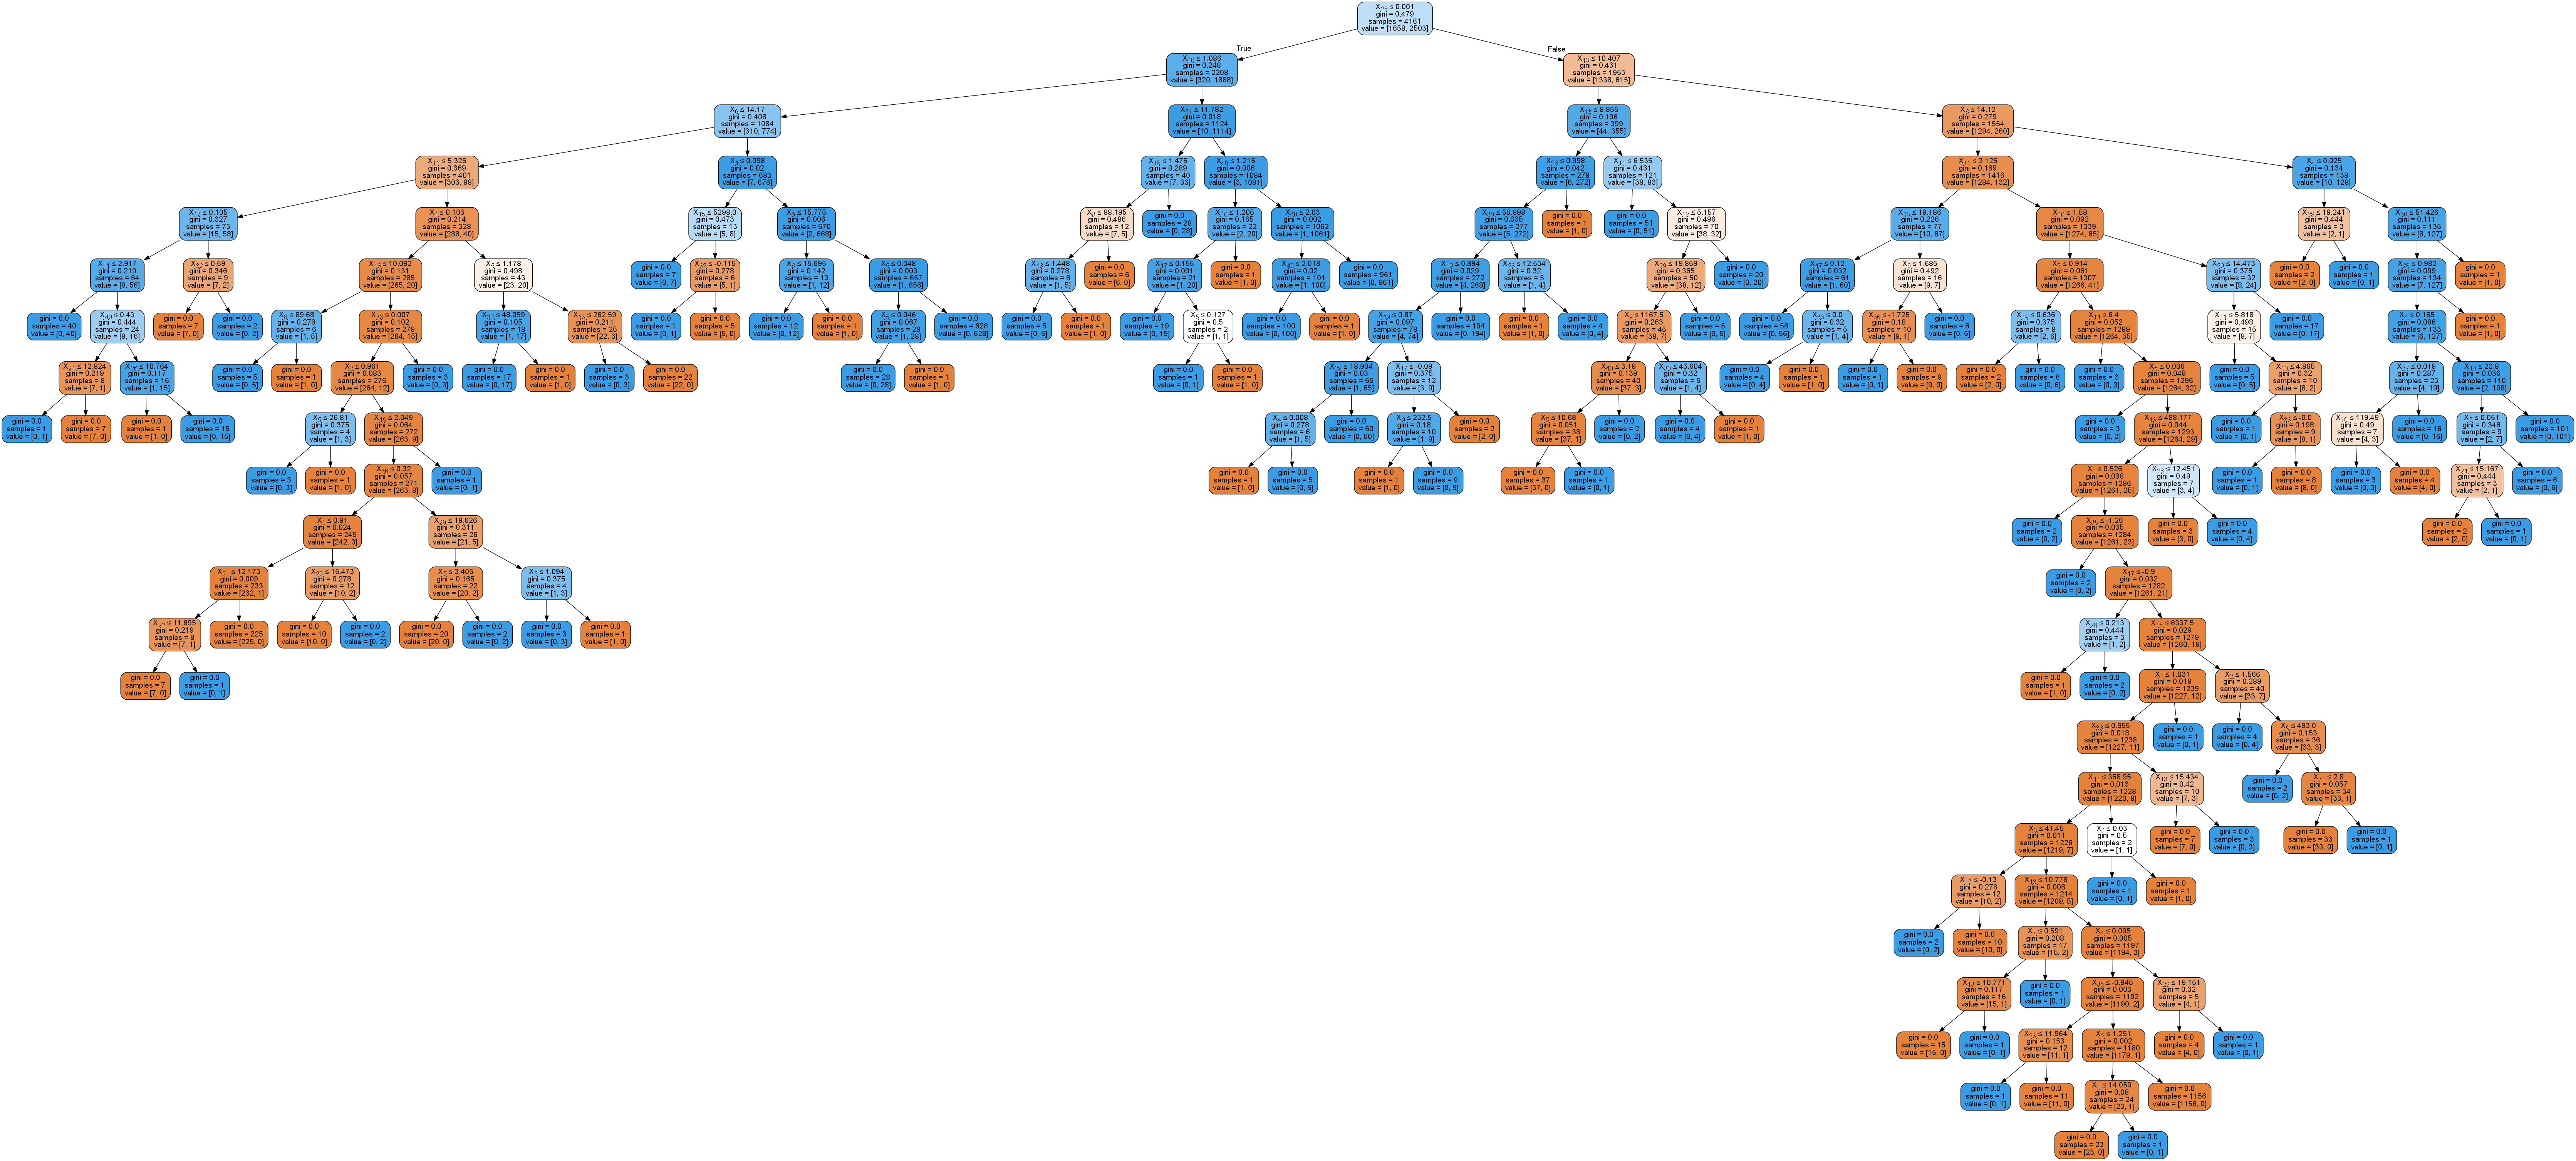

In [62]:
# Gerando um pdf com a árvore de decisão criada
dot_data = tree.export_graphviz(classificador_decisionTree, out_file=None,
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("dt_gerada", format='png')
display(Image(filename='./dt_gerada.png'))

Realizando a classificação utilizando a árvore de decisão

In [63]:
# Realizando os testes com a validação cruzada
resultado_dt = cross_val_score(classificador_decisionTree, X_teste, Y_teste, cv=kfold).mean()
print("[Decision Tree] Acurácia: " + str(resultado_dt))

[Decision Tree] Acurácia: 0.917408906882591


### 3º Algoritmo: SVM (Suport Vector Machine)
Utilizando o algoritmo SVM para gerar modelos de classificadores

A ideia aqui é gerar modelos com kernels diferentes (linear, sigmoid, polinomial e RBF) e comparar pra ver qual teve o melhor desempenho

> OBS: O modelo com kernel linear não está rodando na minha máquina :( Deixei por mais de 10 minutos e não rodou, então não estou utilizando ele (deixei comentado)

In [64]:
# Criando os SVMs com diferentes kernels
# classificador_svm_linear = svm.SVC(kernel='linear', C=1)
classificador_svm_sigmoid = svm.SVC(kernel='sigmoid', C=1)
classificador_svm_polinomial = svm.SVC(kernel='poly', C=1)
classificador_svm_rbf = svm.SVC(kernel='rbf', C=1)

# Treinando os modelos com o conjunto de treinamento
# classificador_svm_linear.fit(X_treino, Y_treino)
classificador_svm_sigmoid.fit(X_treino, Y_treino)
classificador_svm_polinomial.fit(X_treino, Y_treino)
classificador_svm_rbf.fit(X_treino, Y_treino)

# Realizando os testes com validação cruzada
# resultado = cross_val_score(classificador_svm_linear, X_teste, Y_teste, cv=kfold).mean()
# print("[SVM Linear] Acurácia: " + str(resultado))

# Mostrando a acurácia dos SVMs com diferentes kernels
resultado_svm_sigmoid = cross_val_score(classificador_svm_sigmoid, X_teste, Y_teste, cv=kfold).mean()
print("[SVM Sigmoid] Acurácia: " + str(resultado_svm_sigmoid))

resultado_svm_poly = cross_val_score(classificador_svm_polinomial, X_teste, Y_teste, cv=kfold).mean()
print("[SVM Polinomial] Acurácia: " + str(resultado_svm_poly))

resultado_svm_rbf = cross_val_score(classificador_svm_rbf, X_teste, Y_teste, cv=kfold).mean()
print("[SVM RBF] Acurácia: " + str(resultado_svm_rbf))

# Pegando o melhor resultado
resultado_svm = max(resultado_svm_rbf, resultado_svm_poly, resultado_svm_sigmoid)

[SVM Sigmoid] Acurácia: 0.643605079131395
[SVM Polinomial] Acurácia: 0.571544902465955
[SVM RBF] Acurácia: 0.6580143540669856


Como podemos observar, o SVM com melhor acurácia foi o com kernel RBF, com em média ~= 65% de acurácia, que para um modelo linear principalmente em um problema com tantas features como o deste trabalho, é uma precisão muito boa.

### 4º Algoritmo: K-Nearest-Neighbors
Utilizando o Algoritmo de K-Vizinhos-Próximos para gerar o modelo do classificador.

A ideia é ir variando o número de Vizinhos para achar a melhor versão do modelo

In [65]:
# Criando o classificador com N=5
# Testar diferentes valores de N
classificador_knn = [0,0,0,0,0]
resultados_knn = [0,0,0,0,0]

# Aumentando o número de vizinhos (de 100 em 100)
for i in range(5):
    classificador_knn[i] = KNeighborsClassifier(n_neighbors = (i+1)*100)
    classificador_knn[i].fit(X_treino, Y_treino)

    # Realizando a previsão
    resultados_knn[i] = cross_val_score(classificador_knn[i], X_teste, Y_teste, cv=kfold).mean()
    print("[KNN - " + str((i+1)*100) + " vizinhos] Acurácia: " + str(resultados_knn[i]))

# Pegando o melhor valor do knn
resultado_knn = max(resultados_knn)

[KNN - 100 vizinhos] Acurácia: 0.7540807876334192
[KNN - 200 vizinhos] Acurácia: 0.7205051527419948
[KNN - 300 vizinhos] Acurácia: 0.682016010305484
[KNN - 400 vizinhos] Acurácia: 0.6091047110783953
[KNN - 500 vizinhos] Acurácia: 0.5437154950312845


Como pudemos observar, quanto mais o número de vizinhos é aumentado, **menor** é a acurácia do modelo. E por que? Isso acontece porque com uma quantidade muito grande de vizinhos próximos, o modelo não vai conseguir separar bem as classes, vai traçar uma circunferência que pega muitos valores, o que faz com que a precisão caia bastante.

OBS: Primeiro fiz de 5 em 5, e a precisão não mudou muito. Alterei para de 100 em 100 para poder visualizar melhor essa queda de performance

### 5º Algoritmo: Random Forest

In [66]:
# Criando uma Random Forest com 100 árvores
# Variar o número de árvores
classificador_randomForest10 = RandomForestClassifier(n_estimators=10)
classificador_randomForest1000 = RandomForestClassifier(n_estimators=1000)
classificador_randomForest10.fit(X_treino, Y_treino)
classificador_randomForest1000.fit(X_treino, Y_treino)

# Realizando a previsão
resultado_rf10 = cross_val_score(classificador_randomForest10, X_teste, Y_teste, cv=kfold).mean()
print("[Random Forest - 10 árvores] Acurácia: " + str(resultado_rf10))

resultado_rf1000 = cross_val_score(classificador_randomForest1000, X_teste, Y_teste, cv=kfold).mean()
print("[Random Forest - 1000 árvores] Acurácia: " + str(resultado_rf1000))

resultado_rf = max(resultado_rf10, resultado_rf1000)

[Random Forest - 10 árvores] Acurácia: 0.9442629738682371
[Random Forest - 1000 árvores] Acurácia: 0.9615660655134338


O que pude perceber alterando o número de árvores utilizadas no Random Forest, é que quanto mais árvores, mais lento fica a sua execução, mas não fica necessariamente mais preciso. Na execução acima, por exemplo, a Random Forest com 1000 árvores ficou com um pouco mais de acurácia que a com 10 árvores, mas por outro lado demorou muito mais para ser executada, o que não vale a pena. Além do que em outros testes essa acurácia maior mudava de lado ou se igualava.

### 6º Algoritmo: Gradient Tree Boosting

In [67]:
# Criando um Gradient Tree Boosting com número de iterações = 100
# TODO: Variar o número de iterações
classificador_gtb = GradientBoostingClassifier(n_estimators=100)
classificador_gtb.fit(X_treino, Y_treino)

resultado_gtb = cross_val_score(classificador_gtb, X_teste, Y_teste, cv=kfold).mean()
print("[Gradient Tree Boosting] Acurácia: " + str(resultado_gtb))

[Gradient Tree Boosting] Acurácia: 0.9529306220095695


### Avaliando resultados
Através da geração de cada modelo de classificação utilizando os dados de treinamento, e aplicando a validação cruzada nos dados de teste, foi gerado um valor de acurácia para os modelos e suas variações, como pode ser visto a seguir:

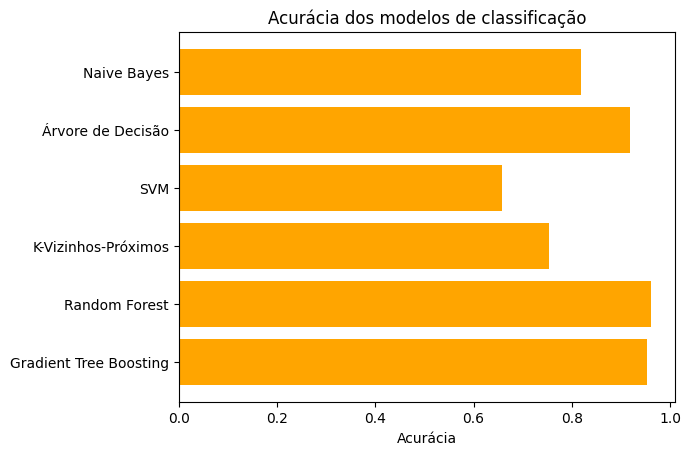

In [68]:
# resultado_svm = max(resultado_svm_poly, resultado_svm_rbf, resultado_svm_sigmoid)
resultados = {
    "Naive Bayes": resultado_naive,
    "Árvore de Decisão": resultado_dt,
    "SVM": resultado_svm,
    "K-Vizinhos-Próximos": resultado_knn,
    "Random Forest": resultado_rf,
    "Gradient Tree Boosting": resultado_gtb
}

modelos = [i for i in resultados.keys()]
acuracia = [j for j in resultados.values()]
modeloPos = np.arange(len(modelos)).__invert__()

plt.barh(modeloPos, acuracia, align='center', color="orange")

plt.yticks(modeloPos, modelos)
plt.xlabel('Acurácia')
plt.title('Acurácia dos modelos de classificação')

plt.show()

- Podemos ver que o modelo com a **maior precisão**, a maior acurácia média após o treinamento e realização dos testes, foi o Random Forest, seguido do Gradient Tree Boosting, ambos com aproximadamente 95% de acurácia. 
- Já o algoritmo com a **pior precisão** foi o SVM, com pouco mais de 65% de acurácia média.

Isso acontece porque o algoritmo do SVM é o mais simples de todos, já que ele apenas define uma margem máxima entre as classes dos dados, portanto, é uma classificação linear, e sabemos que não é a melhor opção em casos mais complexos como o desse problema.

Por outro lado, o Random Forest e o Gradient Tree Boosting são métodos ensemble, ou seja, que utilizam modelos mais fracos para desenvolver um modelo mais forte, e utilizam árvore de decisão (que inclusive foi o 3º melhor modelo testado), portanto a precisão aumenta muito, principalmente em casos mais complexos